<a href="https://colab.research.google.com/github/Mulac/TDA-MNIST/blob/master/approach_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/pytorch/examples/blob/master/mnist/main.py

https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

https://towardsdatascience.com/deep-learning-with-pytorch-a93b09bdae96

In [96]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import numpy as np 
import matplotlib.pyplot as plt 

### Prepare Data
1. Download data (there's a step before this we can take to add transformations to the data)

In [102]:
transform = transforms.Compose([transforms.ToTensor()])

In [103]:
train = torchvision.datasets.MNIST('./data/train', train=True, transform=transform, download=True)
valid = torchvision.datasets.MNIST('./data/valid', train=False, transform=None, download=True)

2. Check the data has right number of examples

In [104]:
train, valid

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data/train
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ), Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data/valid
     Split: Test)

3. Show the first training examlpe and corresponding label (target)

Shape: torch.Size([28, 28])
Label: 5


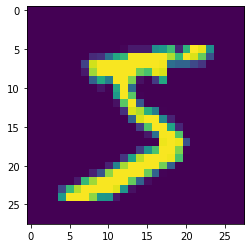

In [105]:
example = 0

img, label = train.data[example], train.targets[example]
print("Shape:", img.shape)
print("Label:", label.item())
plt.imshow(img)

4. Package into a dataloader object ready to send to the model

In [116]:
train_loader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid)

### Create Model
Two ways to do this.  Either by inheriting from the Module class or by using nn.Sequential

In [134]:
model = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3),
                      nn.ReLU(),
                      nn.Flatten(),
                      nn.Linear(26*26, 10))

In [136]:
images, labels = next(iter(train_loader))

output = model(images)
output

tensor([[ 0.0356,  0.0491, -0.0529,  0.0040, -0.0616,  0.0347,  0.0834,  0.0264,
          0.0323,  0.0341]], grad_fn=<AddmmBackward>)

### Choose loss function and optimiser
e.g. Mean Squared Error (MSE) with Stochastic Gradient Decent (SGD)

### Define training loop
Grab batch from data loader; make model predictions; calculate loss; compute gradients; update weights;

### Execute training loop
Can be in a for loop for multiple epochs (number of passes through the whole dataset)

### Evaluate Model
Uses the validation set to test the model